In [1]:
%matplotlib qt
import hyperspy.api as hs
import matplotlib.pyplot as plt
import os, glob
import numpy as np

In [2]:
root = r"G:\My Drive\PhD\projects\sed_ML\clustering_poyen"
experiment = r"data\20221029_first_attempt\cluster_navigators"
wildcard = "*cluster_*.hspy"

dp_data = r"data\experimental\20200209_163154_centre_rebin_nav_rebin_sig.hspy"

dp = hs.load(os.path.join(root, dp_data), lazy=True)
print(dp)

vbf = dp.T.sum()
vbf.compute()
print(vbf)

files = glob.glob(os.path.join(root, experiment, wildcard))
files.sort()
len(files)

<LazySignal2D, title: , dimensions: (127, 127|257, 257)>
[########################################] | 100% Completed | 26.0s


<Signal2D, title: , dimensions: (|127, 127)>


15

In [3]:
# Load the clustered maps

clusters = hs.load(files, stack=True)
clusters

[########################################] | 100% Completed |  0.1s


<Signal2D, title: cluster_navigators, dimensions: (15|127, 127)>

In [4]:
clusters.plot()

In [ ]:
# Make mean dp patterns

masks = clusters.data

dp_masked = []
for c in clusters:
    temp = dp * c.T
    temp = temp.sum()
    temp.compute()
    dp_masked.append(temp)

dp_masked = hs.stack(dp_masked)

dp_masked.save(os.path.join(root, experiment, 'mean_dp_for_each_cluster.hspy'))

In [5]:
(dp_masked ** 0.33).plot(cmap='viridis')

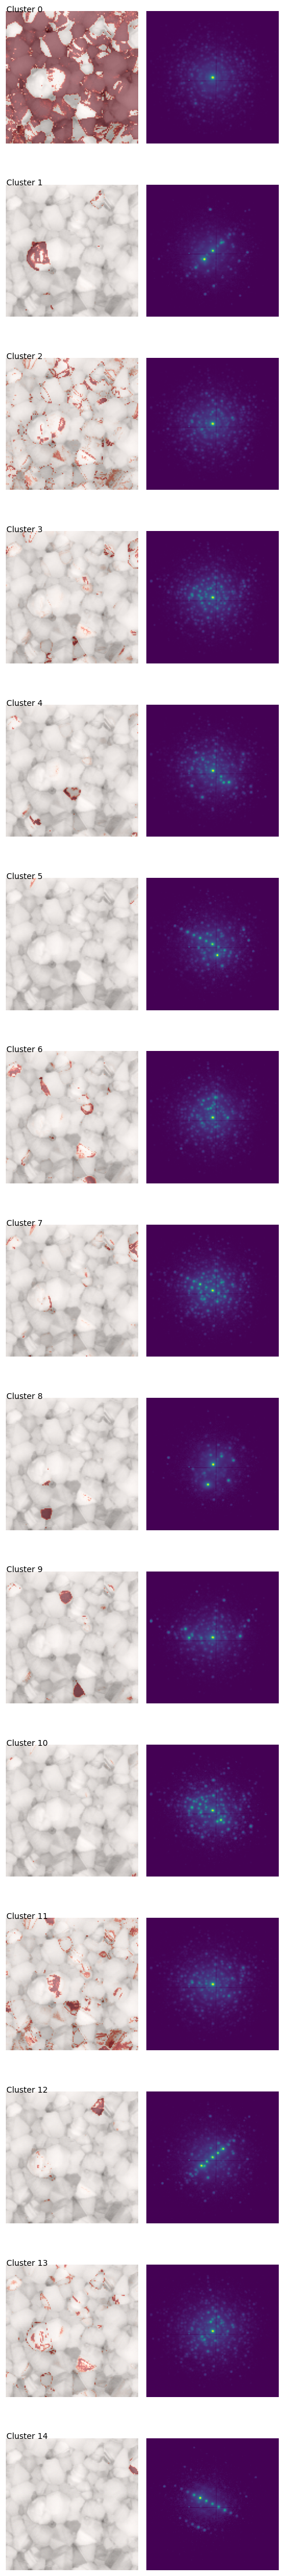

In [48]:
# Plot region with dp
%matplotlib inline

nrows = dp_masked.data.shape[0]
f, ax = plt.subplots(ncols=2, nrows=nrows, figsize=(5,3*nrows))

for i in range(nrows):
    ax[i,0].imshow(vbf.data, cmap='Greys')
    ax[i,0].imshow(clusters.inav[i].data, cmap='Reds', alpha=0.5)
    ax[i,0].text(0,0,s=f'Cluster {i}')

    ax[i,1].imshow(dp_masked.inav[i].data ** 0.33, cmap='viridis')

    ax[i,0].axis('off')
    ax[i,1].axis('off')

plt.tight_layout()